# Activity from the Openclassrooms course : Use Python libraries for Data Science

## 1. Data description

The data consists of a dataset of numbers of births in US for each day for the period 1969 to 2008.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [3]:
data.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


## 2. Data cleaning

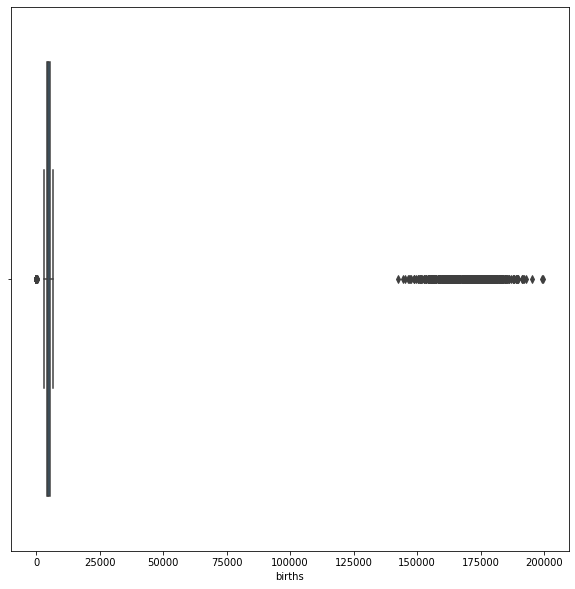

In [2]:
#take off the outliers with the boxplot
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,10))
fig=sns.boxplot(data.births)

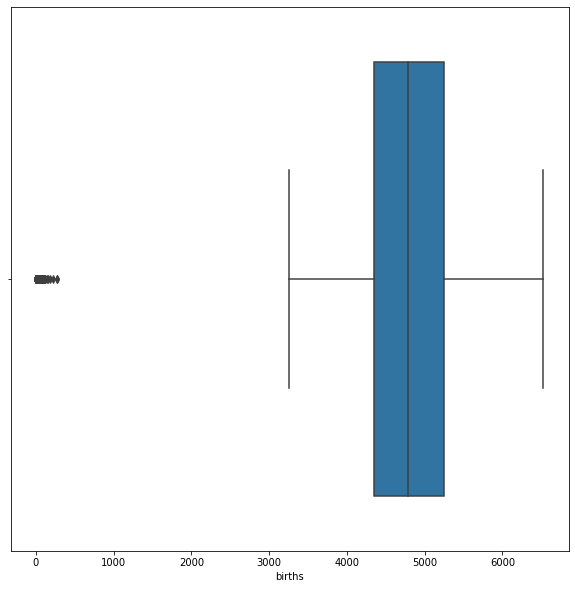

In [4]:
#we see 2 sets of outliers a first one between 125,000 and around 250,000 and a second one near 0 but a zoom in is needed.
data = data[data['births'].between(0, 25000)]
fig=plt.figure(figsize=(10,10))
fig=sns.boxplot(data.births)

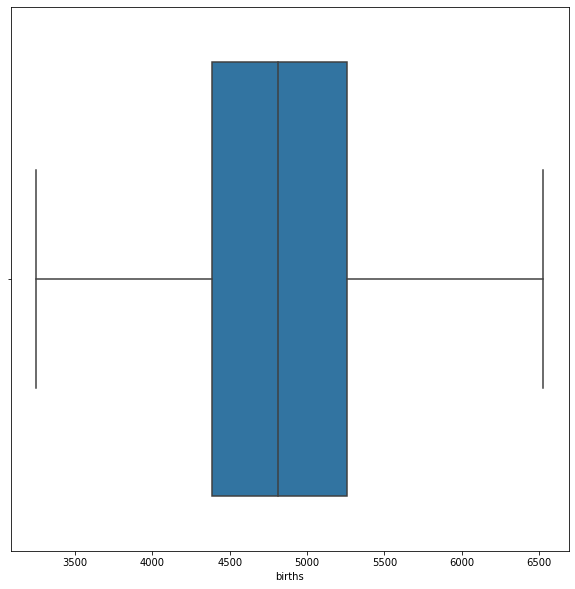

In [5]:
#the second set of outliers is between 0 and 1000 so.
data = data[data['births'].between(3000, 25000)]
fig=plt.figure(figsize=(10,10))
fig=sns.boxplot(data.births)

In [20]:
df = pd.DataFrame(data)
data = data.dropna(axis="index") #remove the NULL values
df = df[df['day'].between(1, 31)] #remove the day values not including in [1;31]

,year,month,day,gender,births,decade,Datetime,weekday
0,1969,1,1.0,F,4046,1960,1969-01-01,2
1,1969,1,1.0,M,4440,1960,1969-01-01,2
2,1969,1,2.0,F,4454,1960,1969-01-02,3
3,1969,1,2.0,M,4548,1960,1969-01-02,3
4,1969,1,3.0,F,4548,1960,1969-01-03,4
...,...,...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980,1988-12-29,3
15063,1988,12,30.0,F,5742,1980,1988-12-30,4
15064,1988,12,30.0,M,6095,1980,1988-12-30,4
15065,1988,12,31.0,F,4435,1980,1988-12-31,5


## 3. Data preparation

In [ ]:
df['decade'] = df['year']//10*10 #get the decade for each rows
df['Datetime']=pd.to_datetime(df[['year','month','day']], errors='coerce') #convert into datetime
df['weekday'] = df['Datetime'].dt.weekday #convert datetime into weekday
df

In [21]:
Number_of_births=df.pivot_table('births', index='weekday', columns='decade', aggfunc="sum")
Number_of_births

decade,1960,1970,1980
weekday,,,
0,526638,4895418,4949739
1,549754,5090433,5173612
2,537910,4949892,5045584
3,517742,4903588,5013476
4,531220,4992508,5069502
5,483710,4392927,4214867
6,451604,4154367,4041017


## 4. Plot : Number of births vs weekday for each decades 60s, 70s, 80s

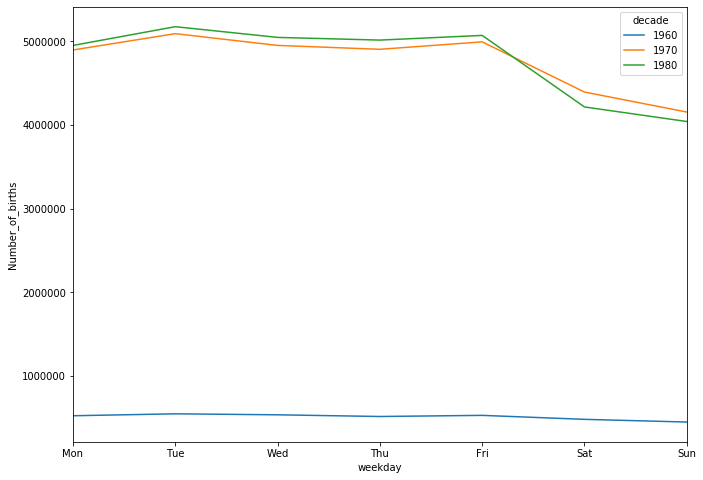

In [22]:
Number_of_births.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Number_of_births');

A quick look on that plot learn to us there is a data shortage for the 60s decade because the 3 lines should have the same number of births range. Moreover on Saturday and Sunday we can see a decrease à births.